# Distribuciones continuas

## Distribución normal (Gaussiana)
Un ejemplo numérico con el siguiente dataset:     
https://seattlecentral.edu/qelp/sets/057/057.html

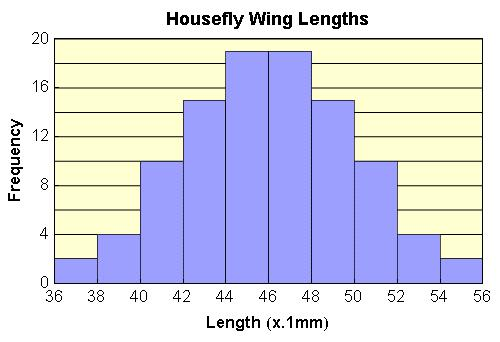



Vamos a descargar el archivo e implementarlo en el código.

Además vamos a entender como a partir de los datos surge la distribución Gaussiana. Además esta función se puede describir mediante esta ecuación:

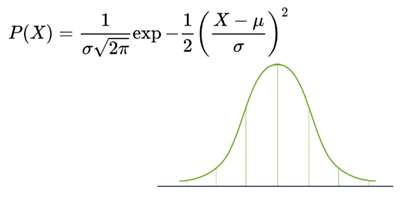

Muchas personas llaman a esta gráfica **la campana de Gauss**. Esta es una de las distribuciones continuas mas importantes de la probabilidad.

## Distribución normal teórica


$$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$$

* $\mu$: media de la distribución (promedio)
* $\sigma$: desviación estándar de la distribución
* $X$: variable aleatoria

In [2]:
#Importar librerías
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm 

Vamos a escribir la función de **Distribución normal** en código de Python:

In [3]:
# definimos nuestra distribución gaussiana
def gaussian(x, mu, sigma):
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow((x-mu)/sigma,2))

Ahora lo que haremos, es crear una lista de datos en la cual aplicaremos nuestra función de **distribución**.

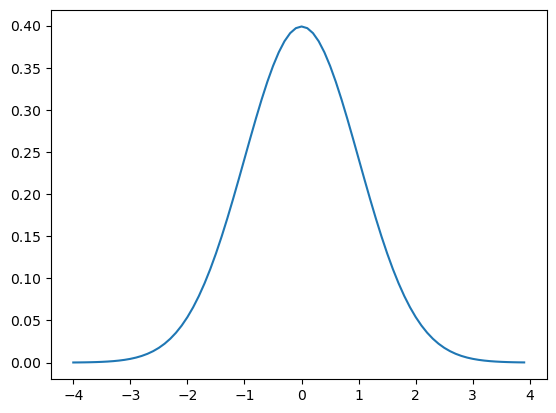

In [4]:
# Creando una lista en Numpy con una secuencia de 
#-4 a 4 separados por un intervalo de 0.1
x =np.arange(-4,4,0.1)

#Ajustamos parámetros de la función 
#le decimos que tiene promedio 0 y desviación estándar de 1
y=gaussian(x,0,1)

#Graficamos la función
plt.plot(x,y)

**¿Qué pasa si ahora le digo que el $\mu$ es decir promedio es 1?**

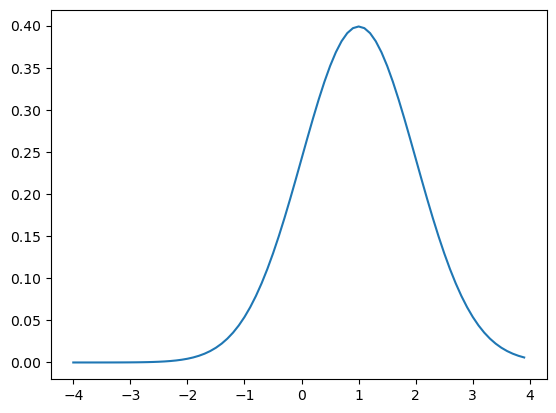

In [5]:
#Ajustamos parámetros de la función 
#le decimos que tiene promedio 1 y desviación estándar de 1
y=gaussian(x,1,1)

#Graficamos la función
plt.plot(x,y)

Como se puede observar la gráfica se desplaza hacia la derecha, y el punto máximo se encuentra centrado en $X=1$

Ahora, ¿Que pasará si la $\sigma$ es decir la desviación estándar es menor?¿y qué pasará si es mayor?

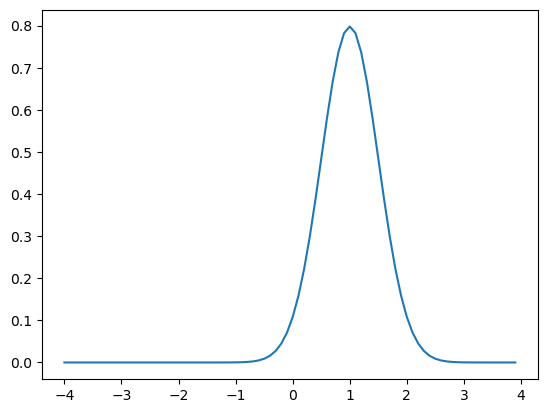

In [6]:
#Ajustamos parámetros de la función 
#le decimos que tiene promedio 1 y desviación estándar de 0.5
y=gaussian(x,1,0.5)

#Graficamos la función
plt.plot(x,y)

Como se puede observar si $\sigma =0.5$, el ancho de la gráfica disminuye. Entonces podemos intuir que si es mayor a 1, la gráfica se hará mas ancha. Probemos:

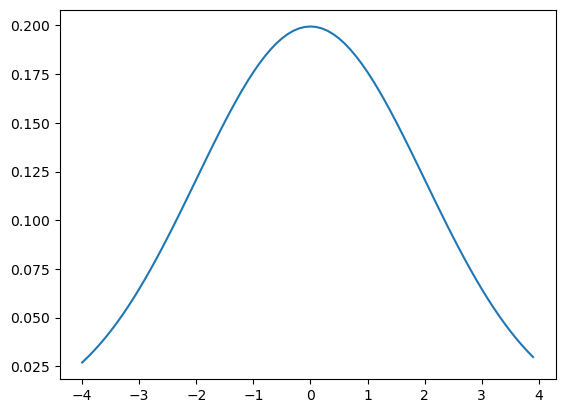

In [7]:
#Ajustamos parámetros de la función 
#le decimos que tiene promedio 0 y desviación estándar de 2
y=gaussian(x,0,2)

#Graficamos la función
plt.plot(x,y)

Entonces ya podemos observar com funcionan los parámetros de una función **Campana de Gauss**,algunos me permiten desplazarla, otros adelgazar o ensanchar la forma.

## Scipy
Una vez que ya vimos algunas características importantes, usaremos Scipy.

Podemos crear una distribución en Scipy. Para ello importamos 
```python
from scipy.stats import norm
```
La linea anterior me permite construir una distribución normal Gaussiana con la librería de Scipy.
```js
norm(promedio,desviacion_estandar)
```

También vamos a utilizar a `pdf()` **(Probability Density Funcion), es decir la Función de Densidad de Probabilidad**, para aplicarla a un rango de datos.

Con esta función lo que le estoy diciendo, es que llene los valores de distribución evaluando los valores de x con la distribución normal
```python
#Aplicando la distribución con pdf()
y = [distribucion.pdf(value) for value in x ]
```

Al final nos queda graficar para obtener y visualizar la distribución.


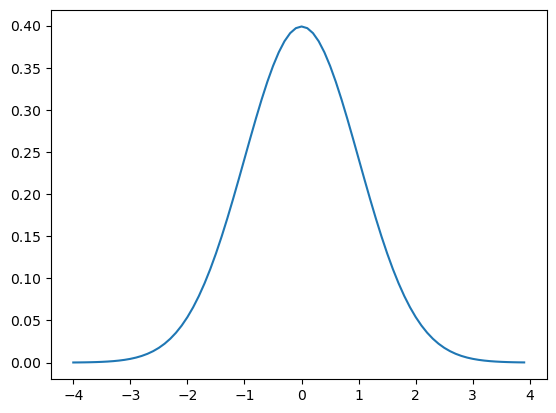

In [8]:
#Creamos una distribución normal
distribucion= norm(0,1)

#Creamos una variable X
x=np.arange(-4,4,0.1)

#Aplicando la distribución con pdf()
y = [distribucion.pdf(value) for value in x ]

#Graficamos
plt.plot(x,y)


Es importante ver que obtenemos lo mismo que obtuvimos con nuestra función implementada. 
Ahora pasemos a lo siguiente, que es analizar otros parámetros.

## Distribución acumulada de probabilidad
Es importante recordar que como todas las distribuciones ya sean discretas o continuas. La distribución Gaussiana (continua) también su **Distribución acumulada**, la cual es la integral de esta función.

Sin embargo en un curso de calculo se verá que esta función, no es fácilmente integrable: 
$$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$$
Por lo que no vamos a hacer los cálculos a mano, pero vamos a utilizar **Scipy**, que ya cuentan como poder calcular esta función de manera numérica.

Es decir se realizan aproximaciones de esta integral, así que lo que haremos ahora será:    

Generar nuevamente los mismos valores, pero en esta ocasión no obtendré la **Función de Densidad de Probabilidad** sino que obtendré la **Función de Densidad de Probabilidad Acumulada** (Cumulative Distribution Function)
```python
cdf()
```

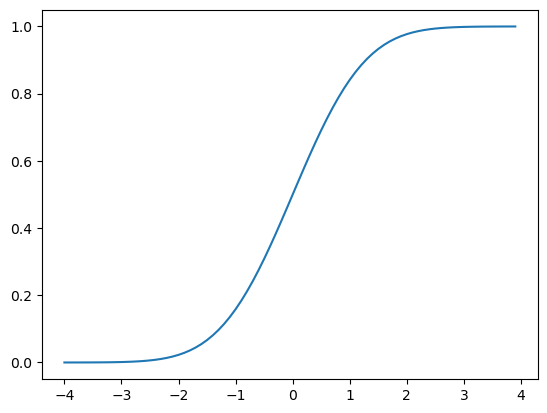

In [9]:
#Creamos una distribución normal
distribucion= norm(0,1)

#Creamos una variable X
x=np.arange(-4,4,0.1)

#Aplicando la distribución con pdf()
y = [distribucion.cdf(value) for value in x ]

#Graficamos
plt.plot(x,y)

Esta Es la forma que tiene la **Distribución de Probabilidad Acumulada** que está asociada a la **Función Gaussiana**.

Esto ya nos permite evidencia que Scipy es muy robusta; tiene funcionalidades para poder calcular todo lo que necesitemos sobre la distribución Gaussiana y podemos calcular probabilidades en términos de Densidades como probabilidades Acumuladas.

La siguiente parte vamos a trabajar con un archivo.

## Distribución normal (gausiana) a partir de los datos

* *El archivo excel* lo puedes descargar en esta página: https://seattlecentral.edu/qelp/sets/057/057.html

Este es un archivo que tiene un conjunto de datos que particularmente sigue una distribución Gaussiana. El archivo contiene la **longitud de ala** de los **mosquitos de casa**.

Estos datos lo que nos muestran es; si recogemos una muestra de todo el set, vamos a darnos cuenta de que el tamaño de las **alas de los mosquitos** efectivamente sigue una distribución Gaussiana.

Entonces el siguiente paso, es importar el dataset para poder trabajar dentro del dataset

In [10]:
#Leyendo archivo
df_mosqui=pd.read_excel('dataset/s057.xls')
df_mosqui

,Normally Distributed Housefly Wing Lengths,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Sokal, R.R., and P.E.Hunter. 1955.",NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,length (x.1mm),NaN,NaN,NaN
3,36,NaN,Bin,Frequency
4,37,NaN,36-38,2
...,...,...,...,...
98,52,NaN,NaN,NaN
99,53,NaN,NaN,NaN
100,53,NaN,NaN,NaN
101,54,NaN,NaN,NaN


In [11]:
df_mosqui.columns

Index(['Normally Distributed Housefly Wing Lengths', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3'],
      dtype='object')

Como se puede observar tenemos un archivo con **103 filas** y **4 Columnas**, ahora lo que me interesa es la columna de *"Normally Distributed Housefly Wing Lengths"*.     

Lo que haremos será crear un arreglo con esos datos.

```python
df_mosqui['Normally Distributed Housefly Wing Lengths'].values
```

Con la linea de código anterior le estoy diciendo que me de solo la lista de valores de la columna **Normally Distributed Housefly Wing Lengths'**, es decir excluimos los indices.

In [12]:
#Creando array
df_mosqui['Normally Distributed Housefly Wing Lengths'].values

array(['Sokal, R.R., and P.E.Hunter. 1955. ', nan, 'length (x.1mm)', 36,
       37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42,
       42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50,
       50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55],
      dtype=object)

Los primeros valores son etiquetas de la columna, que no me interesan, así que seleccionare a partir del elemento 4.

In [14]:
arr= df_mosqui['Normally Distributed Housefly Wing Lengths'].values[4:]

Cada uno de los datos anteriores son valores del tamaño de las alas de un mosquito. Ahora implementaremos una función de Numpy, que es `unique()`, la cual nos entrega los valores únicos de un arreglo de datos.

In [15]:
#Me da los valores únicos y las frecuencias
np.unique(arr,return_counts=True)

(array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55], dtype=object),
 array([ 1,  2,  2,  4,  6,  7,  8,  9, 10, 10,  9,  8,  7,  6,  4,  2,  2,
         1,  1]))

Así que el método anterior me regresa 2 listas. La primera con los **Valores** y la segunda con la **Frecuencia del valor**. Por lo que podemos usar la siguiente estructura:
```js
valores,frecuencia = np.unique(arr,return_counts=True)
```

<BarContainer object of 19 artists>

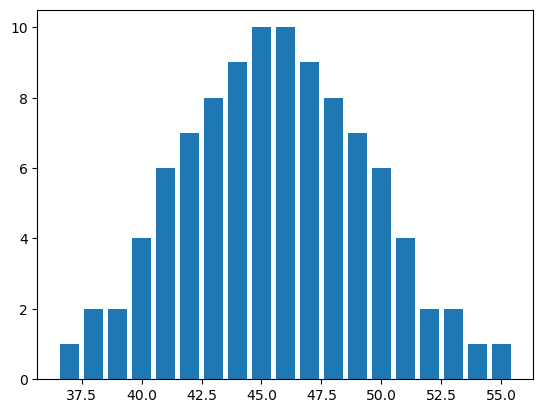

In [16]:
#Obteniendo los valores y su frecuencia de aparición 
valores,distri=np.unique(arr,return_counts=True)

#Graficando los datos anteriores
plt.bar(valores,distri)

A simple vista parece ser una campana de Gauss, pero para estar seguros de que es así. Tenemos que hacer lo siguiente:
**Estimación de distribución**

In [17]:
#Calculando promedio
promedio = arr.mean()
#Calculando desviación estándar
desviacion=arr.std()

Ya que que he calculado los parámetros anteriores, lo que tengo que hacer es obtener una lista de datos en X que tengan un intervalo similar al de los datos de la **longitud de alas**. Entonces creare una lista en el rango de 40 a 60. Como se puede ver en la gráfica, los datos van de 37.5 a 55.0, entonces es una buena aproximación, ademas los datos estarán separados por una diferencia de 0.1.

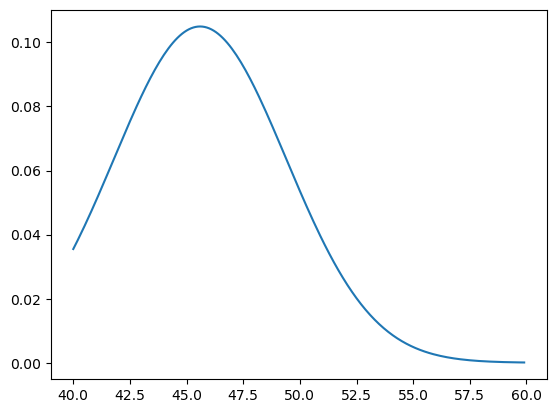

In [18]:
#Construyendo variable X con los valores similares a la gráfica
x=np.arange(40,60,0.1)

#Obteniendo un distribución Gaussiana mediante los parámetros
#media(promedio) y desviación estándar
distribucion=norm(promedio,desviacion)

#Aplicando distribución para obtener la densidad de probabilidad
y=[distribucion.pdf(value) for value in x]

#Graficando los datos
plt.plot(x,y)


Para complementar el código y compararlo con el histograma, tenemos que normalizar estos datos - Por que en uno tenemos probabilidades y en el otro tenemos una variable de longitud y frecuencias, tenemos que normalizarlo:
```js
valores,distri=np.unique(arr,return_counts=True)
```
**¿Cómo lo hacemos?**
en la linea de código de graficar solo tenemos que normalizar el eje y. Veamos como se hace.

<BarContainer object of 19 artists>

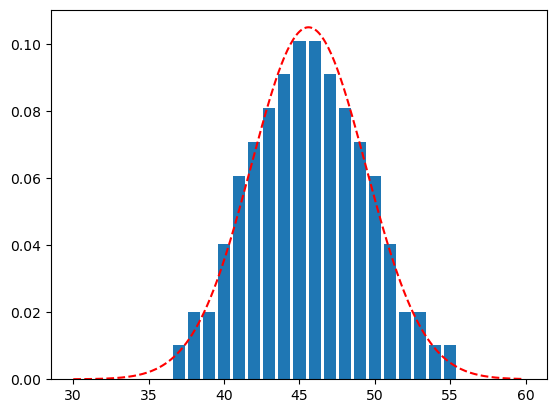

In [31]:
#Construyendo variable X con los valores similares a la gráfica
x=np.arange(30,60,0.1)

#Obteniendo un distribución Gaussiana mediante los parámetros
#media(promedio) y desviación estándar
distribucion=norm(promedio,desviacion)

#Aplicando distribución para obtener la densidad de probabilidad
y=[distribucion.pdf(value) for value in x]

#Graficando los datos
plt.plot(x,y,color='r',linestyle = 'dashed')

#Obteniendo los valores y su frecuencia de aparición 
valores,distri=np.unique(arr,return_counts=True)

#Graficando los datos anteriores
plt.bar(valores,distri/len(arr))


Efectivamente esto es una distribución Gaussiana con un promedio y una desviación estándar calculados a partir de los datos:
```python
#Calculando promedio
promedio = arr.mean()
#Calculando desviación estándar
desviacion=arr.std()
```
Este procedimiento que hicimos para verificar si nuestros datos se asemejan a una distribución Gaussiana o distribución normal. Lo que hicimos fue forzar los parámetros de la distribución Gaussiana con el **promedio y la desviación estándar** de los datos en si mismos. Este procedimiento se llama **Estimación Paramétrica** y es algo en lo que profundizaremos en la proxima clase.

Lo importante es darnos cuenta que el ejercicio evidencia que este tipo de distribuciones son importantes, no porque se definan de manera abstracta sino porque los datos de situaciones reales motivan la necesidad de trabajar con este tipo de métodos matemáticos.

Y esta gráfica en particular con la que terminamos el notebook nos esta enseñando eso. Así que esto nos enseña que la distribución normal o Gaussiana aparece en situaciones cotidianas.

Sin embargo existen mas distribuciones:
- Exponencial
- Pareto
- Gamma 
- Beta
- ...

## Extras
- [Norm Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)
   $$\Large{f(x)= \frac{ \exp \left[ \frac{-x^2}{2}\right]}{\sqrt{2\pi}}}$$